In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Naive Bayes

There are two common naive bayes classifier in ``scikit-learn.naive_bayes`` module. 
 
- ``GaussianNB``: suitable for data with **continuous features**. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) for details. 
- ``CategoricalNB``:  suitable for data with **categorical features**. It assumes that each feature has its own categorical distribution. Need to convert string features as numbers before modeling. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB) for details.

Check [User Guide](https://scikit-learn.org/stable/modules/naive_bayes.html) for more details and examples.

**Naive Bayes with Mixed Features**

If the data include both continuous and categorical features, you may consider the following two options:

- Discretize continuous features by binning instances into different intervals,  then use ``scikit-learn.CategoricalNB`` function. 
- Install the **mixed-naive-bayes** package and use its ``MixedNB`` function.  Check the [documentation](https://github.com/remykarem/mixed-naive-bayes) for more details. 


To use ``MixedNB`` function for modeling: 
```python
from mixed_naive_bayes import MixedNB
model = MixedNB().fit(X,y)                            # if all features (X) are continuous
model = MixedNB(categorical_features=[0,1]).fit(X,y)  # if categorical features (X) in the 1st and 2nd col 
model = MixedNB(categorical_features='all').fit(X,y)  # if all features (X) are categorical 
```

The methods for class prediction, class probability estimation,  evaluation are all the same as **scikit-learn**. 



## 1. Data Preparation

The **iris** data set consists of **4 continuous features for 150 flowers**:  Sepal Length, Sepal Width, Petal Length, and Petal Width.  
- The target variable is **species**: ``Setosa(0)``, ``Versicolour(1)``, and ``Virginica(2)``, which means this is a multi-class task. 

Check [this link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) for more details of this dataset.


In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True, as_frame = True)

display(y.unique(), y.shape, X.shape,  X.describe())     

array([0, 1, 2])

(150,)

(150, 4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Split data**

- Let's skip feature scaling this time.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 50)  # 50% for test

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 4)

(75, 4)

(75,)

(75,)

## 2. Modeling

We use ``GaussianNB`` as all four features are continuous. 



In [4]:
model = GaussianNB().fit(X_train, y_train)

With new data, we can further update the model with the `partial_fit` method for incremental learning:
```python
model.partial_fit(X_new, y_new)
```

**Prior class count/probability**

In [5]:
model.class_count_    # number of training instances observed in each class.

array([25., 24., 26.])

In [6]:
model.class_prior_    # prior probability of each class

array([0.33333333, 0.32      , 0.34666667])

**Mean and variance for each feature per class**

- According to each feature's mean and variance in each class, calculate the conditional probability for each feature value in each class. e.g., $𝑝(e_i|c_i)$.

 


In [7]:
model.theta_   # mean for each feature (column) in each class (row) 

array([[4.96      , 3.416     , 1.444     , 0.232     ],
       [5.89583333, 2.76666667, 4.24583333, 1.3125    ],
       [6.45769231, 2.97692308, 5.36538462, 2.        ]])

In [8]:
model.var_    # variance for each feature (column) in each class (row) 

array([[0.0888    , 0.097344  , 0.032064  , 0.010976  ],
       [0.21539931, 0.11138889, 0.20664931, 0.04526042],
       [0.35782545, 0.07639054, 0.22303255, 0.0823077 ]])

## 3. Model Evaluation 

First, let's the confusion matrix for this model on the test data.  

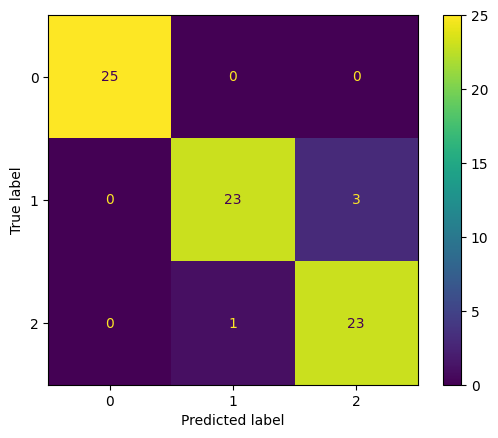

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = model,  X = X_test, y = y_test)
plt.show()

<font color=red>***Exercise 1: Your Codes Here***</font>  

Can you complete the following two tasks?

**Step 1**: Count the number of ``TP``, ``FP`` and ``FN`` for each class.  Note that in a multi-class task:

- Every class is be considered as the `Positive` and the remaining classes together are considered as `Negative`. Therefore, there is no ``TN`` (which is considered as ``TP`` for each class).

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))
cm_df = pd.DataFrame(
    cm,
    columns=['Pred Setosa', 'Pred Versicolour', 'Pred Virginica'],
    index=['True Setosa', 'True Versicolour', 'True Virginica']
)
display(cm_df)

tp = np.diag(cm)
TP0, TP1, TP2 = tp
FP0, FP1, FP2 = cm.sum(axis=0) - tp
FN0, FN1, FN2 = cm.sum(axis=1) - tp

summary = pd.DataFrame(
    {
        'TP': [TP0, TP1, TP2],
        'FP': [FP0, FP1, FP2],
        'FN': [FN0, FN1, FN2]
    },
    index=['Setosa', 'Versicolour', 'Virginica']
)
summary

,Pred Setosa,Pred Versicolour,Pred Virginica
True Setosa,25,0,0
True Versicolour,0,23,3
True Virginica,0,1,23


,TP,FP,FN
Setosa,25,0,0
Versicolour,23,1,3
Virginica,23,3,1


**Step 2**: Calculate the ``precision``, ``recall``, and ``f1`` score for class 2 (i.e., `virginica`) only.

In [11]:
# Metrics for class 2 (virginica)
precision_class2 = TP2 / (TP2 + FP2)
recall_class2 = TP2 / (TP2 + FN2)
f1_class2 = 2 * precision_class2 * recall_class2 / (precision_class2 + recall_class2)

pd.Series(
    {
        'precision (Virginica)': precision_class2,
        'recall (Virginica)': recall_class2,
        'f1 (Virginica)': f1_class2
    }
)

precision (Virginica)    0.884615
recall (Virginica)       0.958333
f1 (Virginica)           0.920000
dtype: float64

In this way, we can compute the scores for each class, then summarize them with different `average` method. 

### 3.1  Metrics: Accuracy, Precision, Recall and F1 score 

For mult-class tasks, the parameter `average` is important in ``recall_score``, ``precision_score`` and ``f1_score`` functions and it takes the following values.   

- `'macro'`: calculate metrics for each class and take the average. This approach weights each class equally and does not consider class imbalance. 

- `'micro'`: calculate metrics globally and weigh each instance equally. It is same as accuracy. 
 
- `'weighted'`: calculate metrics for each class label, and find their average weighted by `support` (the number of true instances for each class).

- `None`: the scores for each class are returned.

**Plain Accuracy**

In [12]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)    # model.score(X_test, y_test)

0.9466666666666667

**Precision, Recall and F1 scores for Each Elass**

You should be able to achieve the same result as in exercise 1. 

- ``average`` = ``None``: a class is considered as the Positve and the remaining classes are considered as Negative.  

In [13]:
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)
f1 = f1_score(y_test, y_pred, average = None)

display(precision, recall, f1)

array([1.        , 0.95833333, 0.88461538])

array([1.        , 0.88461538, 0.95833333])

array([1.  , 0.92, 0.92])

**Macro-precision, Macro-recall and Macro-f1 score**

- ``average`` = ``'macro'``:  treat each class equally, calculate metrics for each class label and find their mean. 
 

In [14]:
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

display(precision, recall, f1)

0.9476495726495727

0.9476495726495727

0.9466666666666667

**Micro-recall, Micro-precision and Micro-f1 score** 

- ``average`` = ``'micro'``:  treat every instance equally.  

<font color=green>**Same as plain accuracy here**</font>  

In [15]:
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')

display(precision, recall, f1)

0.9466666666666667

0.9466666666666667

0.9466666666666667

**Weighted-precision, Weighted-recall and Weighted-f1 score**


In [16]:
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

display(precision, recall, f1)

0.9486324786324787

0.9466666666666667

0.9466666666666667

**Classification Report**

Check classification report for all results in one-go.

In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_true = y_test, 
                               y_pred = y_pred, 
                               target_names = ['Setosa', 'Versicolour', 'Virginica'],   # optional
                               digits = 4)   

print(report)  

              precision    recall  f1-score   support

      Setosa     1.0000    1.0000    1.0000        25
 Versicolour     0.9583    0.8846    0.9200        26
   Virginica     0.8846    0.9583    0.9200        24

    accuracy                         0.9467        75
   macro avg     0.9476    0.9476    0.9467        75
weighted avg     0.9486    0.9467    0.9467        75



### 3.2  ROC Curve for Multi-class Tasks

In [18]:
# Estimate class probabilities for each test instance

y_prob = model.predict_proba(X_test)

y_prob

array([[2.76173618e-071, 9.99400755e-001, 5.99244589e-004],
       [6.96344380e-118, 8.49142084e-001, 1.50857916e-001],
       [1.00000000e+000, 1.61499495e-014, 1.07233363e-023],
       [1.00000000e+000, 7.54546875e-016, 4.53991170e-026],
       [3.58110370e-163, 2.95530671e-004, 9.99704469e-001],
       [1.14239285e-216, 1.67823043e-008, 9.99999983e-001],
       [3.32009676e-149, 1.64098425e-002, 9.83590158e-001],
       [1.00000000e+000, 6.61149909e-011, 2.62542835e-020],
       [1.00000000e+000, 9.42919116e-018, 1.63055343e-027],
       [6.17463047e-101, 9.95333421e-001, 4.66657871e-003],
       [1.00000000e+000, 7.20022625e-017, 1.88843589e-026],
       [1.02522703e-215, 5.86159315e-007, 9.99999414e-001],
       [1.00000000e+000, 1.75590103e-016, 3.72445496e-026],
       [1.25026037e-188, 4.99060117e-006, 9.99995009e-001],
       [1.15025168e-087, 9.96772682e-001, 3.22731800e-003],
       [1.00000000e+000, 2.59536416e-015, 6.92643387e-025],
       [7.92296757e-062, 9.99936223e-001

#### 3.2(a) The `matplotlib` Approach 

The `matplotlib.pyplot.plot` function visualizes the FPR and TPR scores at different thresholds for each class as a line.  Check the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for details. 


- Alternatively, use the  `RocCurveDisplay`  class for the visualization. Need to specify the `ax` parameter to plot all curves in one plot.




**Obtain FPR and TPR at Different Thresholds First**

We need to use the `roc_curve` function (check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) ) to calculate the FPR and TPR scores at different thresholds first.  

- As the function is restricted to binary classification tasks, we **binarize target labels** and then go through each class one by one.
  



In [19]:
# Binarize target labels for multi-class ROC

from sklearn.preprocessing import label_binarize

ytest_binarized = label_binarize(y_test, classes=[0, 1, 2])      

ytest_binarized

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

**Visualizing ROC Curves for Each Class**

Note here we put the three ROC curves for the three classes in one plot, for better comparison.  

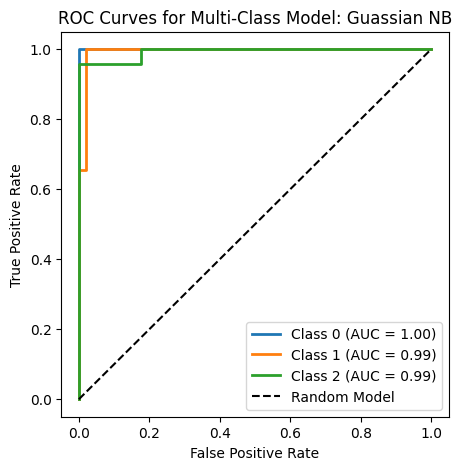

In [20]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (5,5))

for i in [0,1,2]:                                               # go through each class label      
    fpr, tpr, _ = roc_curve(y_true = ytest_binarized[:,i],      # binarized class label for class i 
                            y_score = y_prob[:,i],              # the corresponding class probabilities
                            pos_label = 1)                      # positive label is always 1
    auc_score = auc(x = fpr, y = tpr)                           # calculate auc for each class                          
    plt.plot(fpr, tpr, linewidth = 2, label= 'Class {} (AUC = {:0.2f})'.format(i, auc_score))     # visualize as a line

plt.plot([0, 1], [0, 1], color = 'black', linewidth= 1.5, linestyle='--', label = 'Random Model')  # add roc for the random model     
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Model: Guassian NB')
plt.legend(loc='lower right')
plt.show()

#### 3.2(b) The `scikit-learn` Approach

Please use `RocCurveDisplay.from_predictions` function to visualize the ROC curve for each class. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions) for details. 

- The function expects **binarized target label** and estimated **class probabilities**. 
- You may visualize the three curves in the same plot by specifying the `ax` parameter, or visualize each curve separately.

Note the `RocCurveDisplay.from_estimator` function (check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator)) expects a **binary classification model**, therefore NOT used here. 


  <font color=red>***Exercise 2: Your Codes Here***</font>  


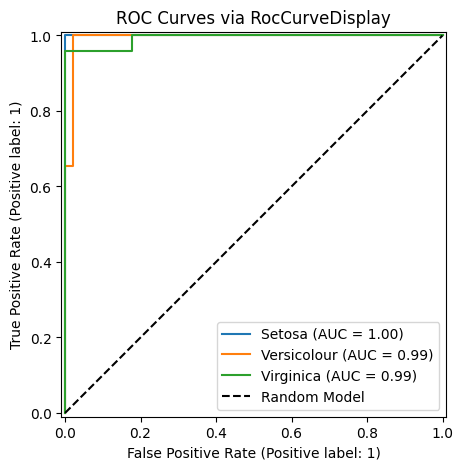

In [21]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize = (5,5))
class_labels = ['Setosa', 'Versicolour', 'Virginica']

for idx, label in enumerate(class_labels):
    RocCurveDisplay.from_predictions(
        y_true = ytest_binarized[:, idx],
        y_pred = y_prob[:, idx],
        name = label,
        ax = ax
    )

ax.plot([0, 1], [0, 1], color = 'black', linewidth = 1.5, linestyle = '--', label = 'Random Model')
ax.set_title('ROC Curves via RocCurveDisplay')
ax.legend(loc='lower right')
plt.show()


### 3.3 AUC for Multi-class tasks 

In addition to `sklearn.metrics.auc` function, we can also calculate the area under roc curve with `roc_auc_score` function. Check [documentation](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) for details.

- For multi-class task, we need to specify the `multi-class` and `average` parameter.
- This function is applied to both binary and multi-class tasks.

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true = y_test, 
              y_score = y_prob,
              multi_class = 'ovr',       # default 'raise' 
              average = None)            # default 'macro', other options include 'micro', 'weighted' 

array([1.        , 0.99293564, 0.99264706])

## 4. Optional: Hyperparameter Tuning For Multi-class Tasks

For multi-class data's hyperparameter tuning, some predefined `scoring` values (e.g., 'f1_macro', 'f1_weighted', 'f1_micro', 'roc_auc_ovr_weighted') are available, but not all.  Check [this link](https://scikit-learn.org/1.5/modules/model_evaluation.html#scoring-parameter) for details about predefined values.

Alternatively, define a custom scoring metric with the `make_scorer` function (check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) for details).  Below example shows how to use **macro recall** score for hyperparameter tuning: 

```python
from sklearn.metrics import make_scorer, recall_score
macro_recall = make_scorer(recall_score, average='macro')
GridSearchCV(...,scoring = macro_recall)   
```



In [23]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV

# Tune GaussianNB's var_smoothing with macro recall scoring
macro_recall = make_scorer(recall_score, average='macro')
param_grid = {
    'var_smoothing': np.logspace(-12, -6, num=7)
}

grid = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    scoring=macro_recall,
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Best var_smoothing:', grid.best_params_['var_smoothing'])
print('Best CV macro recall:', grid.best_score_)

cv_results = (
    pd.DataFrame(grid.cv_results_)[['param_var_smoothing', 'mean_test_score', 'std_test_score']]
    .sort_values('mean_test_score', ascending=False)
)
cv_results.reset_index(drop=True, inplace=True)
cv_results


Best var_smoothing: 1e-12
Best CV macro recall: 0.9433333333333334


,param_var_smoothing,mean_test_score,std_test_score
0,1.000000e-12,0.943333,0.051208
1,1.000000e-11,0.943333,0.051208
2,1.000000e-10,0.943333,0.051208
3,1.000000e-09,0.943333,0.051208
4,1.000000e-08,0.943333,0.051208
5,1.000000e-07,0.943333,0.051208
6,1.000000e-06,0.943333,0.051208
